In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,564.000000
mean,0.817590,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.842199
std,0.386497,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.364878
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [6]:
df.dtypes

Loan_ID               object
Gender               float64
Married               object
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

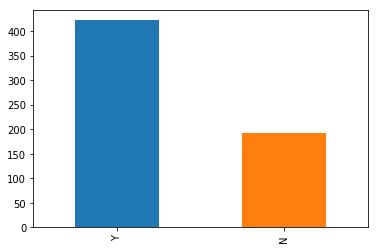

In [7]:
df['Loan_Status'].value_counts().plot(kind='bar')
plt.show()

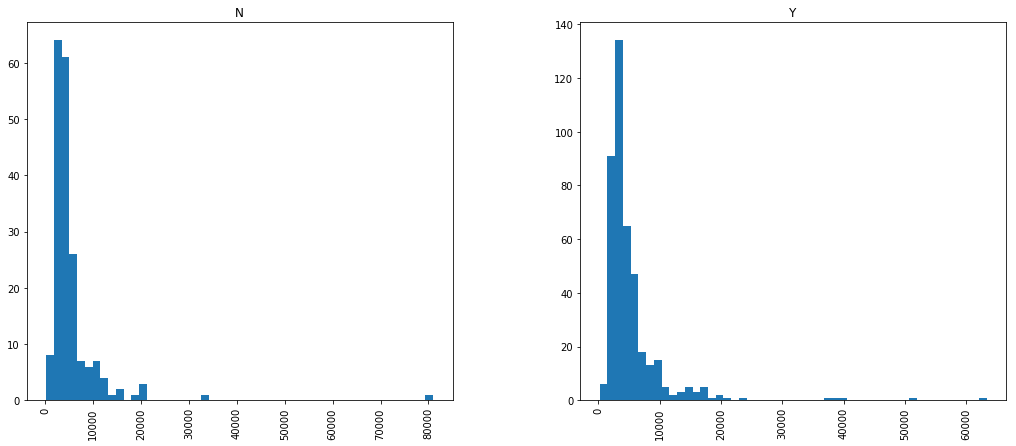

In [8]:
df[['Loan_Status','ApplicantIncome']].hist(by='Loan_Status', bins=50, figsize=(17,7))
plt.show()

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.columns=['Loan_ID','is_Male','is_Married','Dependents','is_Graduated','is_Self_Employed','ApplicantIncome','CoapplicantIncome',
           'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

In [11]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
yes_no_map = {'Yes': 1,'No':0}
df['is_Married'] = df['is_Married'].map(yes_no_map)

In [13]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [15]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [16]:
mapper_status = {'Y':1,'N':0}
df['Loan_Status'] = df['Loan_Status'].map(mapper_status)

In [17]:
df = pd.get_dummies(df,columns=['Property_Area'])

In [18]:
df.drop('Loan_ID', axis=1, inplace = True)

In [19]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,5849.0,0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,6091.0,1,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,3000.0,0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,4941.0,0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,6000.0,0,0,1


In [20]:
df.isnull().sum().sort_values(ascending=False)

Credit_History             50
LoanAmount                 22
is_Married                  3
Property_Area_Urban         0
Property_Area_Semiurban     0
Property_Area_Rural         0
TotalIncome                 0
Loan_Status                 0
Loan_Amount_Term            0
CoapplicantIncome           0
ApplicantIncome             0
is_Self_Employed            0
is_Graduated                0
Dependents                  0
is_Male                     0
dtype: int64

In [21]:
df = df.loc[df['is_Married'].notnull()]

In [22]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace= True)

In [23]:
df['Credit_History'].value_counts()

1.0    472
0.0     89
Name: Credit_History, dtype: int64

In [24]:
df['Credit_History'].fillna(1,inplace=True)

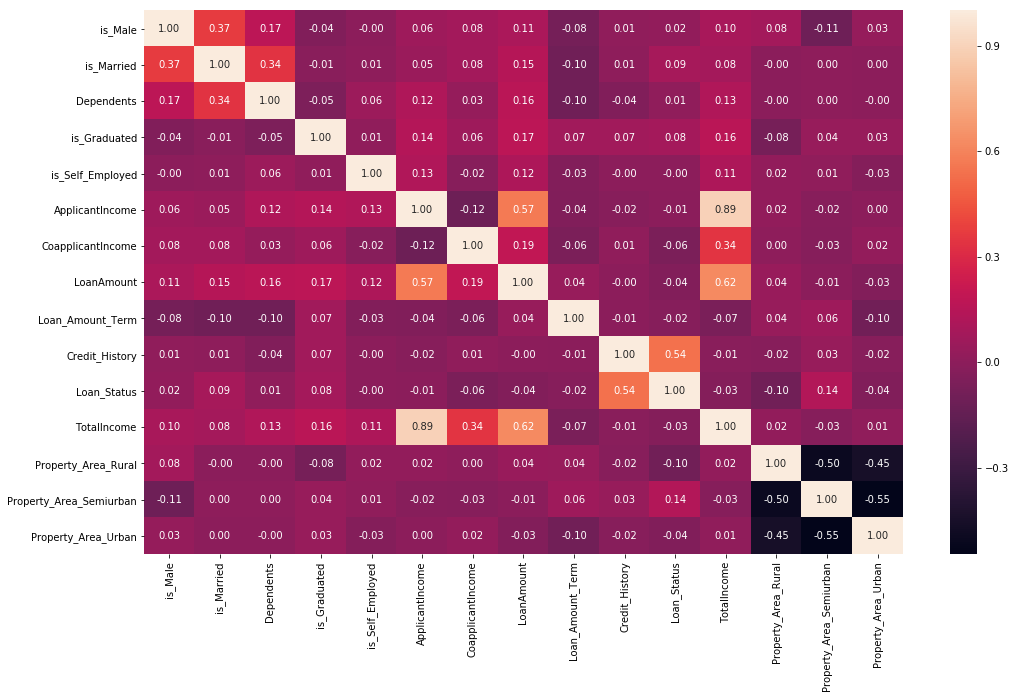

In [25]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True, fmt='.2f')
plt.show()

In [26]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,1,5849.0,0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,6091.0,1,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,3000.0,0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,4941.0,0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,6000.0,0,0,1


In [27]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['TotalIncome'] = np.log(df['TotalIncome'])

In [28]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Score do conjunto de treino:{0:.2%}'.format(lr.score(X_train,y_train)))
print('Score do conjunto de treino:{0:.2%}'.format(lr.score(X_test,y_test)))

Score do conjunto de treino:80.44%
Score do conjunto de treino:82.18%


In [36]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
print('Score do conjunto de treino:{0:.2%}'.format(dt.score(X_train,y_train)))
print('Score do conjunto de treino:{0:.2%}'.format(dt.score(X_test,y_test)))

Score do conjunto de treino:82.15%
Score do conjunto de treino:82.67%


In [38]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf.fit(X_train, y_train)
print('Score do conjunto de treino:{0:.2%}'.format(rf.score(X_train,y_train)))
print('Score do conjunto de treino:{0:.2%}'.format(rf.score(X_test,y_test)))

Score do conjunto de treino:100.00%
Score do conjunto de treino:80.20%


In [41]:
new_df = X_test
dt.predict(new_df)

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1], dtype=int64)

In [42]:
new_df['Loan_Status'] = dt.predict(new_df)

C:\Users\Victor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
new_df

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
81,1.0,1.0,1.0,1,1.0,7.781139,0.000000,146.369492,360.0,1.0,7.781139,0,1,0,1
219,0.0,1.0,2.0,1,0.0,8.362409,2383.000000,127.000000,360.0,1.0,8.804775,0,1,0,1
55,1.0,1.0,2.0,1,0.0,7.903966,1167.000000,97.000000,360.0,1.0,8.262301,0,1,0,1
602,1.0,1.0,3.0,1,0.0,8.648748,0.000000,128.000000,360.0,1.0,8.648748,0,0,1,1
266,1.0,1.0,2.0,1,0.0,8.457018,1387.000000,150.000000,360.0,1.0,8.715224,0,1,0,1
156,1.0,1.0,1.0,1,0.0,8.699515,0.000000,160.000000,360.0,1.0,8.699515,1,0,0,1
486,1.0,0.0,2.0,1,0.0,8.173857,0.000000,80.000000,360.0,0.0,8.173857,1,0,0,0
323,0.0,0.0,0.0,1,0.0,8.060224,2985.000000,132.000000,360.0,1.0,8.724370,1,0,0,1
584,1.0,1.0,1.0,1,0.0,7.932721,1917.000000,146.000000,360.0,0.0,8.456168,1,0,0,0
293,0.0,0.0,0.0,1,0.0,8.597297,0.000000,143.000000,480.0,0.0,8.597297,0,0,1,0


In [44]:
new_df.to_csv('dados_previsto.csv',index=False)

In [45]:
import pickle
pickle.dump(dt,open('modelotreinado.sav','wb'))